In [1]:
!unzip capstone_bar.zip

Archive:  capstone_bar.zip
   creating: capstone_bar/test/
   creating: capstone_bar/test/bar/
  inflating: capstone_bar/test/bar/0004749521000-1-_jpg.rf.ec2fc0aaec187ba2e64ee195d9271a84.jpg  
  inflating: capstone_bar/test/bar/154527ee-944b-43c6-98c5-a3c877c973c5_jpg.rf.a64f79f681ebe54b92b099f3d1563aa7.jpg  
  inflating: capstone_bar/test/bar/2277232_Qiktogetufit_57eda9ec-328d-4a29-b36d-a38031b6e48f_jpg.rf.3d24ec31e822cef1776b5a7c90b29d6e.jpg  
  inflating: capstone_bar/test/bar/30698509-11_jpg.rf.42d4dde79a07a58847e45066da092136.jpg  
  inflating: capstone_bar/test/bar/7144UD-cWWL_jpg.rf.484187872c61021a3562acac0cb23037.jpg  
  inflating: capstone_bar/test/bar/7144UD-cWWL_jpg.rf.580011a75937eefe2aa4651bfd39a221.jpg  
  inflating: capstone_bar/test/bar/7144UD-cWWL_jpg.rf.f3fb693bacb6c7701645583e22d9c603.jpg  
  inflating: capstone_bar/test/bar/71ifsaWdsnL_jpg.rf.47821cb8efeb88fb6a9260f7953858ae.jpg  
  inflating: capstone_bar/test/bar/71ifsaWdsnL_jpg.rf.538fffe20e9c78d3c9c587494a0e2b7

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

input_shape = (224, 224, 3)

base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

base_model.trainable = False

x = base_model.output
x = Conv2D(128, (3, 3), activation='relu')(x)
x = Flatten()(x)
predictions = Dense(1, activation='sigmoid')(x)  \

model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/capstone_bar/train/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    '/content/capstone_bar/validation/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

model.fit(train_generator, validation_data=val_generator)

test_generator = val_datagen.flow_from_directory(
    '/content/capstone_bar/test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

model.evaluate(test_generator)


9406464/9406464 [==============================] - 0s 0us/step
Found 107 images belonging to 1 classes.
Found 55 images belonging to 1 classes.
4/4 [==============================] - 13s 1s/step - loss: 0.2232 - accuracy: 0.8692 - val_loss: 8.8319e-38 - val_accuracy: 1.0000
Found 48 images belonging to 1 classes.
2/2 [==============================] - 1s 935ms/step - loss: 2.8615e-29 - accuracy: 1.0000


[2.8614997668281606e-29, 1.0]

Found 48 images belonging to 1 classes.
1/1 [==============================] - 0s 28ms/step


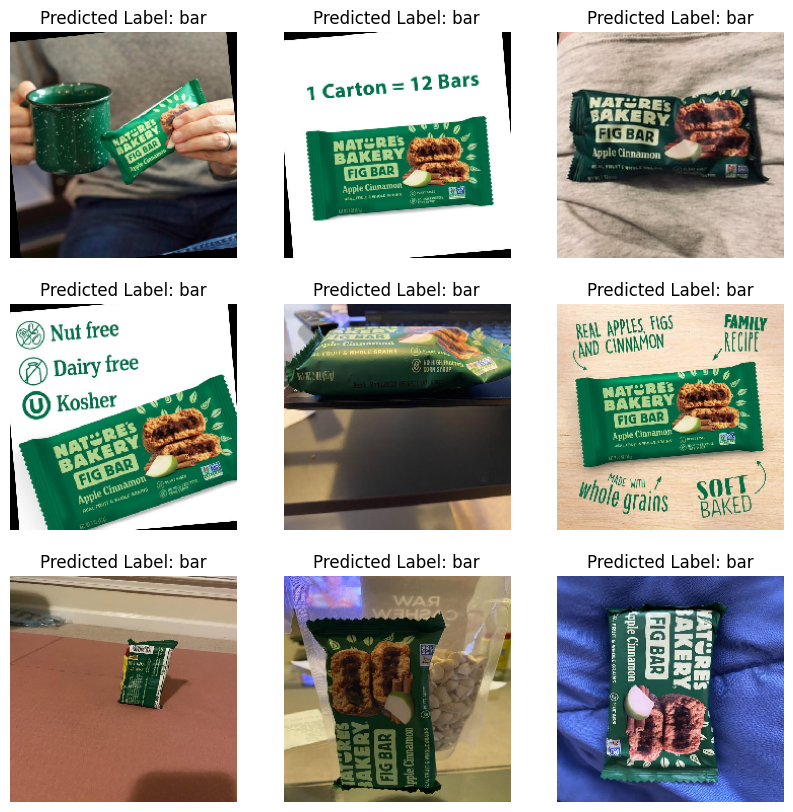

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


test_generator = val_datagen.flow_from_directory(
    '/content/capstone_bar/test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

images, labels = next(test_generator)


class_labels = {0: 'bar'}

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)

    img = images[i] * 255

    plt.imshow(img.astype('uint8'))

    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.mobilenet_v2.preprocess_input(img)

    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)

    plt.title("Predicted Label: {}".format(class_labels[int(labels[i])], class_labels[predicted_label]))
    plt.axis('off')
plt.show()

1/1 [==============================] - 0s 30ms/step


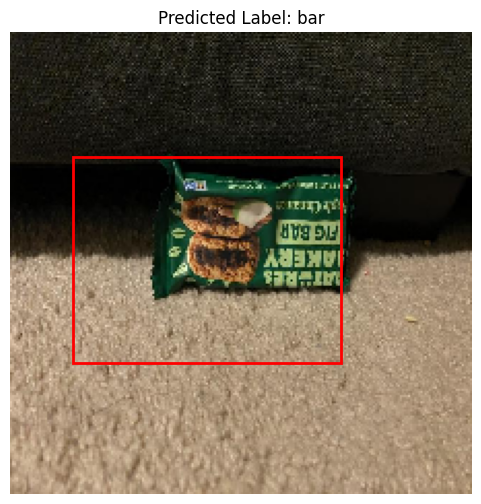

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tensorflow.keras.preprocessing import image

img_path = '/content/IMG_7478_jpg.rf.f607fea5e0b9c47843b4817d53152a8a.jpg'
img = image.load_img(img_path, target_size=(224, 224))

plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)

prediction = model.predict(x)
predicted_label = np.argmax(prediction)

class_labels = {0: 'bar'}

bbox = (30, 60, 160, 160)
rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1], linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)

plt.title("Predicted Label: {}".format(class_labels[predicted_label]))
plt.show()


In [7]:
!unzip capstone_bar_bottle.zip

Archive:  capstone_bar_bottle.zip
   creating: capstone_bar_bottle/test/
   creating: capstone_bar_bottle/test/bar/
  inflating: capstone_bar_bottle/test/bar/0004749521000-1-_jpg.rf.ec2fc0aaec187ba2e64ee195d9271a84.jpg  
  inflating: capstone_bar_bottle/test/bar/154527ee-944b-43c6-98c5-a3c877c973c5_jpg.rf.a64f79f681ebe54b92b099f3d1563aa7.jpg  
  inflating: capstone_bar_bottle/test/bar/2277232_Qiktogetufit_57eda9ec-328d-4a29-b36d-a38031b6e48f_jpg.rf.3d24ec31e822cef1776b5a7c90b29d6e.jpg  
  inflating: capstone_bar_bottle/test/bar/30698509-11_jpg.rf.42d4dde79a07a58847e45066da092136.jpg  
  inflating: capstone_bar_bottle/test/bar/7144UD-cWWL_jpg.rf.484187872c61021a3562acac0cb23037.jpg  
  inflating: capstone_bar_bottle/test/bar/7144UD-cWWL_jpg.rf.580011a75937eefe2aa4651bfd39a221.jpg  
  inflating: capstone_bar_bottle/test/bar/7144UD-cWWL_jpg.rf.f3fb693bacb6c7701645583e22d9c603.jpg  
  inflating: capstone_bar_bottle/test/bar/71ifsaWdsnL_jpg.rf.47821cb8efeb88fb6a9260f7953858ae.jpg  
  inflat

In [8]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False


x = Conv2D(128, (3, 3), activation='relu')(base_model.output)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification


model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(lr=0.001), loss=BinaryCrossentropy(), metrics=[Accuracy()])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/capstone_bar_bottle/train/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    '/content/capstone_bar_bottle/validation/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)


test_generator = val_datagen.flow_from_directory(
    '/content/capstone_bar_bottle/test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

model.evaluate(test_generator)


Found 219 images belonging to 2 classes.
Found 83 images belonging to 2 classes.
Epoch 1/10
7/7 [==============================] - 17s 2s/step - loss: 3.0398 - accuracy: 0.0000e+00 - val_loss: 0.1159 - val_accuracy: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 4s 596ms/step - loss: 0.0871 - accuracy: 0.0091 - val_loss: 0.0105 - val_accuracy: 0.2410
Epoch 3/10
7/7 [==============================] - 5s 722ms/step - loss: 0.0370 - accuracy: 0.3333 - val_loss: 0.0012 - val_accuracy: 0.3373
Epoch 4/10
7/7 [==============================] - 5s 676ms/step - loss: 0.0160 - accuracy: 0.3699 - val_loss: 1.7588e-06 - val_accuracy: 0.3012
Epoch 5/10
7/7 [==============================] - 5s 658ms/step - loss: 0.0180 - accuracy: 0.4064 - val_loss: 0.0014 - val_accuracy: 0.3373
Epoch 6/10
7/7 [==============================] - 5s 621ms/step - loss: 7.2499e-04 - accuracy: 0.5023 - val_loss: 4.6419e-04 - val_accuracy: 0.3373
Epoch 7/10
7/7 [==============================] - 4s 550ms/st

[0.06423453241586685, 0.4166666567325592]

Found 84 images belonging to 2 classes.
1/1 [==============================] - 0s 33ms/step


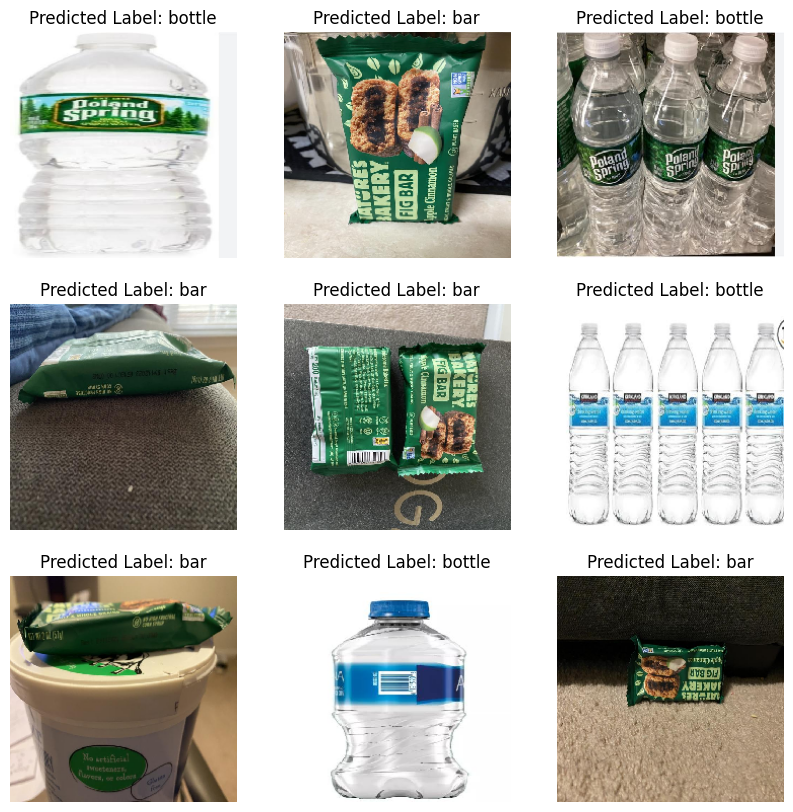

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


test_generator = val_datagen.flow_from_directory(
    '/content/capstone_bar_bottle/test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

images, labels = next(test_generator)

class_labels = {0: 'bar', 1: 'bottle'}


plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)

    img = images[i] * 255

    plt.imshow(img.astype('uint8'))


    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.mobilenet_v2.preprocess_input(img)
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)

    plt.title("Predicted Label: {}".format(class_labels[int(labels[i])], class_labels[predicted_label]))
    plt.axis('off')
plt.show()


3/3 [==============================] - 1s 138ms/step - loss: 0.0642 - accuracy: 0.4167
Evaluation Results: [0.06423457711935043, 0.4166666567325592]


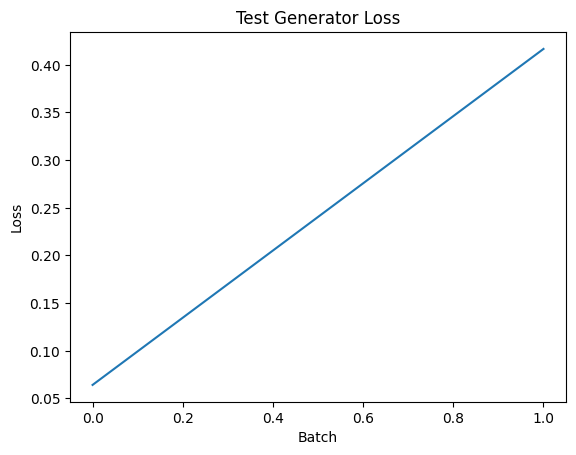

In [26]:
import matplotlib.pyplot as plt

# Evaluate the model on the test data
loss = model.evaluate(test_generator)

# Print out the evaluation results
print("Evaluation Results:", loss)

# Verify that the loss value is not empty
if loss is None:
    print("Test loss value is empty.")
else:
    # Plot the loss value
    plt.plot(loss)
    plt.title('Test Generator Loss')
    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.show()
